<a href="https://colab.research.google.com/github/eleven111101/Gaussian-Na-ve-Bayes-Classifier-/blob/main/Gaussian_Na%C3%AFve_Bayes_Classifier_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
print("Hello world")

Hello world


In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [273]:
df=pd.read_csv("/content/titanic_train.csv")

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [275]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [277]:
df.isnull().sum().sort_values(ascending=False) / len(df)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [278]:
df.shape

(891, 12)

In [279]:
df=df.drop("Cabin",axis=1)

In [280]:
df.shape

(891, 11)

In [281]:
df["Pclass"].unique()

array([3, 1, 2])

<Axes: ylabel='count'>

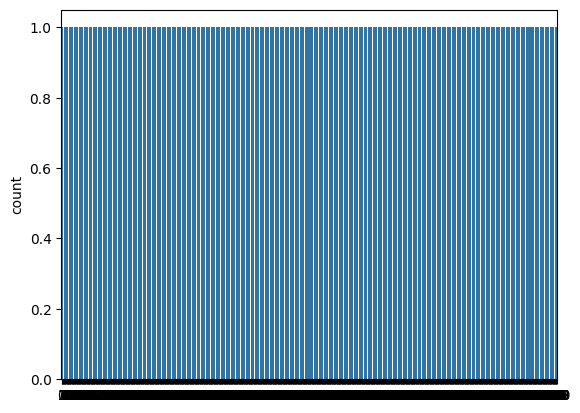

In [282]:
sns.countplot(df["Pclass"])

In [283]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [284]:
df["Age"].mean()

29.69911764705882

In [285]:
df[df["Pclass"]==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [286]:
df[df["Pclass"]==1]["Age"].mean().round()

38.0

In [287]:
df[df["Pclass"]==2]["Age"].mean().round()

30.0

In [288]:
df[df["Pclass"]==3]["Age"].mean().round()

25.0

In [289]:
pc1_mean=df[df["Pclass"]==1]["Age"].mean().round()

In [290]:
pc2_mean=df[df["Pclass"]==2]["Age"].mean().round()

In [291]:
pc3_mean=df[df["Pclass"]==3]["Age"].mean().round()

In [292]:
def fill_age(cols):
  age_col = cols[0]
  pclass_col = cols[1]
  if pd.isnull(age_col):
      if pclass_col == 1:
        return pc1_mean
      elif pclass_col ==2:
        return pc2_mean
      else:
        return pc3_mean
  else :
    return age_col




In [293]:
df["Age"]=df[["Age","Pclass"]].apply(fill_age,axis=1)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [295]:
df["Sex"] = df["Sex"].apply(lambda x : 1 if x== "male" else 0)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [297]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [298]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [299]:
df.dropna(inplace=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [301]:
df=df.drop(["Ticket","Name"],axis=1)

In [302]:
df=df.drop(["PassengerId"],axis=1)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [304]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [305]:
dummies=pd.get_dummies(df["Embarked"] , prefix="Emb_", drop_first = True)

In [306]:
df=pd.concat([df, dummies],axis=1)

In [307]:
df=df.drop("Embarked",axis=1)

In [308]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb__Q,Emb__S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [309]:
df["Pclass"].unique()

array([3, 1, 2])

In [310]:
dummies = pd.get_dummies(df["Pclass"], prefix="Pcl_", drop_first=True)
df=pd.concat([dummies,df],axis=1)
df.drop("Pclass",axis=1)

,Pcl__2,Pcl__3,Survived,Sex,Age,SibSp,Parch,Fare,Emb__Q,Emb__S
0,False,True,0,1,22.0,1,0,7.2500,False,True
1,False,False,1,0,38.0,1,0,71.2833,False,False
2,False,True,1,0,26.0,0,0,7.9250,False,True
3,False,False,1,0,35.0,1,0,53.1000,False,True
4,False,True,0,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,True,False,0,1,27.0,0,0,13.0000,False,True
887,False,False,1,0,19.0,0,0,30.0000,False,True
888,False,True,0,0,25.0,1,2,23.4500,False,True
889,False,False,1,1,26.0,0,0,30.0000,False,False


In [311]:
df.head()

,Pcl__2,Pcl__3,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb__Q,Emb__S
0,False,True,0,3,1,22.0,1,0,7.2500,False,True
1,False,False,1,1,0,38.0,1,0,71.2833,False,False
2,False,True,1,3,0,26.0,0,0,7.9250,False,True
3,False,False,1,1,0,35.0,1,0,53.1000,False,True
4,False,True,0,3,1,35.0,0,0,8.0500,False,True


In [312]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [313]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [316]:
from sklearn.naive_bayes import GaussianNB

In [317]:
nb = GaussianNB()

In [318]:
nb.fit(X_train,y_train)

GaussianNB()

In [319]:
prediction = nb.predict(X_test)

In [320]:
from sklearn.metrics import confusion_matrix , classification_report

In [321]:
print(confusion_matrix(y_test, prediction))

[[138  29]
 [ 31  69]]


In [322]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       167
           1       0.70      0.69      0.70       100

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267

